# - Projeto "Vai chover amanhã?""



In [257]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.metrics import precision_score, recall_score, roc_auc_score, plot_roc_curve
import warnings
warnings.simplefilter("ignore")

## - Leitura dos dados

In [258]:
rain = pd.read_csv('data/rain_data_aus.csv')
rain.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,...,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164


In [259]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              142193 non-null  object 
 1   location          142193 non-null  object 
 2   mintemp           141556 non-null  float64
 3   maxtemp           141871 non-null  float64
 4   rainfall          140787 non-null  float64
 5   evaporation       81350 non-null   float64
 6   sunshine          74377 non-null   float64
 7   humidity9am       140419 non-null  float64
 8   humidity3pm       138583 non-null  float64
 9   pressure9am       128179 non-null  float64
 10  pressure3pm       128212 non-null  float64
 11  cloud9am          88536 non-null   float64
 12  cloud3pm          85099 non-null   float64
 13  temp9am           141289 non-null  float64
 14  temp3pm           139467 non-null  float64
 15  raintoday         140787 non-null  object 
 16  amountOfRain      14

In [260]:
rain['evaporation'].value_counts()

4.0     3282
8.0     2574
2.2     2057
2.0     1996
2.6     1975
        ... 
42.4       1
56.2       1
36.8       1
16.5       1
44.0       1
Name: evaporation, Length: 356, dtype: int64

In [261]:
rain.isna().sum()

date                    0
location                0
mintemp               637
maxtemp               322
rainfall             1406
evaporation         60843
sunshine            67816
humidity9am          1774
humidity3pm          3610
pressure9am         14014
pressure3pm         13981
cloud9am            53657
cloud3pm            57094
temp9am               904
temp3pm              2726
raintoday            1406
amountOfRain            0
raintomorrow            0
temp                  322
humidity             3610
precipitation3pm        0
precipitation9am        0
modelo_vigente          0
dtype: int64

In [262]:
rain["raintoday"]=rain["raintoday"].replace({"No": 0, "Yes": 1})

In [263]:
rain["raintomorrow"]=rain["raintomorrow"].replace({"No": 0, "Yes": 1})

In [264]:
rain.head(10)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,16.9,21.8,0.0,0.0,0,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,17.2,24.3,0.0,0.0,0,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,21.0,23.2,0.0,0.0,0,32.84,38.000000,17,20.782859,0.027580
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,18.1,26.5,0.0,1.0,0,35.60,21.200000,8,12.028646,0.023962
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,...,17.8,29.7,0.0,0.2,0,40.76,41.600000,9,11.883546,0.220164
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,55.0,23.0,1009.2,...,20.6,28.9,0.0,0.0,0,37.64,29.600000,8,17.320994,0.056883
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,49.0,19.0,1009.6,...,18.1,24.6,0.0,0.0,0,32.00,24.800000,8,19.791271,0.030004
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,48.0,19.0,1013.4,...,16.3,25.5,0.0,0.0,0,34.04,24.800000,7,7.207085,0.023000
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,42.0,9.0,1008.9,...,18.3,30.2,0.0,1.4,1,40.28,12.800000,19,1.540702,0.414649
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,58.0,27.0,1007.0,...,20.1,28.2,1.0,0.0,0,38.12,34.400000,7,8.259833,0.064945


## - Construir modelo básico de regressão logística

In [265]:
X_train = rain[['amountOfRain','precipitation3pm','precipitation9am','modelo_vigente',]][0:106645]
X_train.head()

,amountOfRain,precipitation3pm,precipitation9am,modelo_vigente
0,0.0,12,5.115360,0.089825
1,0.0,10,21.497100,0.023477
2,0.0,17,20.782859,0.027580
3,1.0,8,12.028646,0.023962
4,0.2,9,11.883546,0.220164


In [266]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [267]:
y_train = rain['raintomorrow'][0:106645]
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: raintomorrow, dtype: int64

In [268]:
X_valid = rain[['amountOfRain','precipitation3pm','precipitation9am','modelo_vigente',]][106645:135085]


In [269]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_valid)
X_valid = scaler.transform(X_valid)

In [270]:
y_valid=rain['raintomorrow'][106645:135085]

In [271]:
X_test=rain[['amountOfRain','precipitation3pm','precipitation9am','modelo_vigente',]][135085:142194]

In [272]:
y_test=rain['raintomorrow'][135085:142194]

In [273]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [274]:
model.score(X_train, y_train)

0.9962867457452295

In [275]:
model.score(X_valid, y_valid)

0.9974683544303797

### O modelo está apresentando um score muito alto porque a coluna "modelo vigente" já contém uma análise de dados e foi construída justamente para fazer uma boa previsão. Foi incluída por alguém, não faz parte do dataset original. Dessa forma, para a construção do nosso modelo, não devemos considerar essa coluna.


In [276]:
rain.corr()

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,...,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
mintemp,1.000000,0.736267,0.104255,0.467261,0.072961,-0.234211,0.005999,-0.451260,-0.461623,0.077625,...,0.901813,0.708865,0.056185,0.124743,0.083936,0.584512,0.004145,0.001300,-0.001554,0.134768
maxtemp,0.736267,1.000000,-0.074839,0.588915,0.469967,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,...,0.887020,0.984562,-0.228884,-0.044208,-0.159237,0.794183,-0.463989,0.001191,-0.000918,-0.235871
rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.223725,0.255312,-0.168085,-0.126728,0.198195,...,0.011477,-0.079178,0.500997,0.308557,0.239032,-0.059987,0.232724,-0.002410,-0.002792,0.361186
evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,...,0.545497,0.574275,-0.187975,-0.043498,-0.119285,0.465288,-0.355983,0.004543,-0.002419,-0.164926
sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,...,0.291139,0.490180,-0.330635,-0.294973,-0.450768,0.369367,-0.571486,-0.003830,0.003155,-0.639583
humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,1.000000,0.667388,0.139519,0.186955,0.452182,...,-0.472826,-0.499777,0.353358,0.172417,0.257161,-0.400695,0.606853,-0.001347,0.002721,0.393754
humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,0.667388,1.000000,-0.027449,0.051840,0.517037,...,-0.221467,-0.557989,0.378766,0.313183,0.446160,-0.404326,0.908871,-0.000707,0.000464,0.662753
pressure9am,-0.451260,-0.332293,-0.168085,-0.269907,0.040959,0.139519,-0.027449,1.000000,0.961348,-0.130081,...,-0.422773,-0.287301,-0.189804,-0.163673,-0.246371,-0.261068,-0.025464,-0.001760,0.001572,-0.361402
pressure3pm,-0.461623,-0.427279,-0.126728,-0.293160,-0.020464,0.186955,0.051840,0.961348,1.000000,-0.061152,...,-0.470325,-0.389863,-0.106298,-0.164184,-0.226031,-0.335831,0.046812,-0.001651,0.001973,-0.316223
cloud9am,0.077625,-0.289865,0.198195,-0.185032,-0.675610,0.452182,0.517037,-0.130081,-0.061152,1.000000,...,-0.137843,-0.302520,0.305950,0.198095,0.317380,-0.227987,0.469853,-0.001553,0.000611,0.475929


### Fizemos novo modelo, sem a coluna "modelo vigente", e o score continuou muito alto, 99%. Analisando as colunas, notamos que a coluna "amountOfRain"traz a mesma informação que a "raintomorrow", ou seja, ela também traz a informação que buscamos(target). Dessa forma, não pode fazer parte das variáveis explicativas. Para construção do baseline, retiramos essa coluna. Segue o modelo abaixo, que pode ser considerado nosso baseline.

In [277]:
X_train1 = rain[['precipitation3pm','precipitation9am']][0:106645]


In [278]:
y_train1 = rain['raintomorrow'][0:106645]

In [279]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)

In [280]:
X_valid1 = rain[['precipitation3pm','precipitation9am']][106645:135085]

In [281]:
y_valid1 = rain['raintomorrow'][106645:135085]

In [282]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_valid1)
X_valid1 = scaler.transform(X_valid1)

In [283]:
X_test1=rain[['precipitation3pm','precipitation9am']][135085:142194]

In [284]:
y_test1 = rain['raintomorrow'][135085:142194]

In [285]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_test1)
X_test1 = scaler.transform(X_test1)

In [286]:
model1 = LogisticRegression()

In [287]:
model1.fit(X_train1, y_train1)

LogisticRegression()

In [288]:
model1.score(X_train1, y_train1)

0.7729851376060762

In [289]:
model1.coef_

array([[ 0.01239746, -0.01877866]])

In [290]:
rain[['amountOfRain','precipitation3pm','precipitation9am','raintomorrow']].corr()

,amountOfRain,precipitation3pm,precipitation9am,raintomorrow
amountOfRain,1.000000,-0.001491,-0.002363,0.501485
precipitation3pm,-0.001491,1.000000,0.003420,0.004503
precipitation9am,-0.002363,0.003420,1.000000,-0.007018
raintomorrow,0.501485,0.004503,-0.007018,1.000000


In [291]:
#rain.head(40)

In [292]:
rain['raintomorrow'].value_counts(normalize=True)

0    0.775819
1    0.224181
Name: raintomorrow, dtype: float64

#### o modelo parece estar "chutando" tudo como se não fosse chover nunca, pois o score está próximo dos números reais 

### - Apurando nossso baseline

In [297]:
rain['rainfall']=rain['rainfall'].fillna(rain['rainfall'].mean())

In [298]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              142193 non-null  object 
 1   location          142193 non-null  object 
 2   mintemp           141556 non-null  float64
 3   maxtemp           141871 non-null  float64
 4   rainfall          142193 non-null  float64
 5   evaporation       81350 non-null   float64
 6   sunshine          74377 non-null   float64
 7   humidity9am       140419 non-null  float64
 8   humidity3pm       138583 non-null  float64
 9   pressure9am       128179 non-null  float64
 10  pressure3pm       128212 non-null  float64
 11  cloud9am          88536 non-null   float64
 12  cloud3pm          85099 non-null   float64
 13  temp9am           141289 non-null  float64
 14  temp3pm           139467 non-null  float64
 15  raintoday         140787 non-null  float64
 16  amountOfRain      14

In [299]:
rain['humidity3pm']=rain['humidity3pm'].fillna(rain['humidity3pm'].mean())

In [300]:
X_train2 = rain[['rainfall','humidity3pm','precipitation3pm','precipitation9am']][0:106645]


In [301]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train2)
X_train2 = scaler.transform(X_train2)

In [302]:
y_train2=rain['raintomorrow'][0:106645]

In [303]:
X_valid2 = rain[['rainfall','humidity3pm','precipitation3pm','precipitation9am']][106645:135085]

In [304]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_valid2)
X_valid2 = scaler.transform(X_valid2)

In [305]:
y_valid2=rain['raintomorrow'][106645:135085]

In [306]:
model2=LogisticRegression()

In [307]:
model2.fit(X_train2, y_train2)

LogisticRegression()

In [308]:
model2.fit(X_valid2, y_valid2)

LogisticRegression()

In [309]:
model2.score(X_train2, y_train2)

0.8263397252566927

In [310]:
model2.score(X_valid2, y_valid2)

0.8253164556962025

In [311]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [312]:
confusion_matrix(y_train2, model.predict(X_train2))

array([[69674, 12761],
       [13156, 11054]])

### - Comparação dos três modelos: baseline, baseline apurado, e "modelo vigente""


#### - Baseline

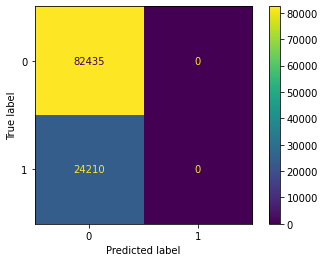

In [317]:
plot_confusion_matrix(model1, X_train1, y_train1, values_format='.0f')

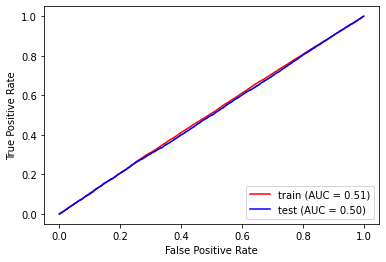

In [315]:
fig, ax = plt.subplots()

plot_roc_curve(model1, X_train1, y_train1, color='red', ax= ax, name='train')
plot_roc_curve(model1, X_valid1, y_valid1, color='blue', ax=ax, name='test')

#### - Baseline apurado

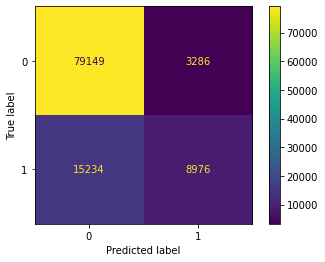

In [313]:
plot_confusion_matrix(model2, X_train2, y_train2, values_format='.0f')

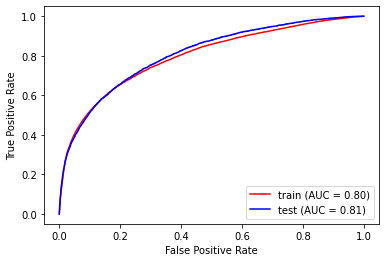

In [316]:
fig, ax = plt.subplots()

plot_roc_curve(model2, X_train2, y_train2, color='red', ax= ax, name='train')
plot_roc_curve(model2, X_valid2, y_valid2, color='blue', ax=ax, name='test')

#### - "Modelo vigente"( gabarito enviado junto com o dataset)

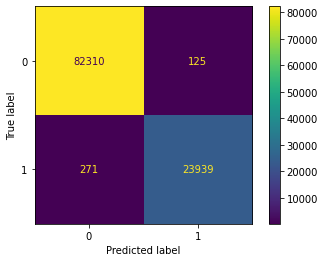

In [318]:
plot_confusion_matrix(model, X_train, y_train, values_format='.0f')

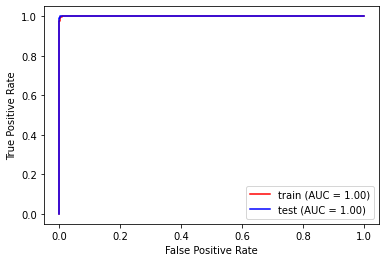

In [314]:
fig, ax = plt.subplots()

plot_roc_curve(model, X_train, y_train, color='red', ax= ax, name='train')
plot_roc_curve(model, X_valid, y_valid, color='blue', ax=ax, name='test')

In [320]:
from sklearn.metrics import confusion_matrix

In [321]:
confusion_matrix(rain['raintomorrow'],rain['modelo_vigente']>0.5)

array([[108365,   1951],
       [  7945,  23932]])

In [323]:
import seaborn as sns

<AxesSubplot:>

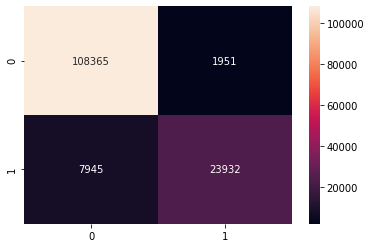

In [326]:
sns.heatmap(confusion_matrix(rain['raintomorrow'],rain['modelo_vigente']>0.5),annot=True,fmt="d")

In [336]:
from lightgbm import LGBMClassifier

In [367]:
lgb = LGBMClassifier(max_depth=4, n_estimators=200, colsample_bytree=.7, n_jobs=-1)

In [358]:
X_train3=rain[['mintemp', 'maxtemp', 'rainfall',
        'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
         'temp', 'humidity', 'precipitation3pm',
       'precipitation9am']]

In [353]:
#X_train3 = X_train3.fillna(-9999)

In [370]:
len(X_train3)

142193

In [350]:
y_train3=rain['raintomorrow']

In [372]:
from sklearn.model_selection import train_test_split

In [373]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_train3, y_train3, stratify=y_train3)

In [374]:
len(X_train4)

106644

In [375]:
len(y_train4)

106644

In [341]:
from sklearn.model_selection import cross_val_score, KFold

In [376]:
results = cross_val_score(lgb, X_train4, y_train4, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8681084841679064, 0.005076889405307905)

In [377]:
results

array([0.86702508, 0.87918116, 0.8665326 , 0.8613513 , 0.86956555,
       0.87312283, 0.86807895, 0.86718046, 0.86052386, 0.86852303])

In [378]:
results = cross_val_score(lgb, X_test4, y_test4, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8581509225865384, 0.0058188306503128276)